**Problem 2**

(c) Verifying the calculations in (a-i) and (b-i)

In [86]:
from numpy.linalg import svd
from numpy.linalg import eig
from numpy import matrix

In [87]:
A = matrix([[1, 1], 
     [1, 1], 
     [1, -1]])

In [89]:
U, sigma, Vt = svd(A)

In [90]:
print(U)

[[-7.07106781e-01 -8.56119755e-17 -7.07106781e-01]
 [-7.07106781e-01 -3.12235301e-16  7.07106781e-01]
 [-1.12180787e-16  1.00000000e+00  5.55111512e-17]]


In [91]:
print(sigma)

[2.         1.41421356]


In [92]:
print(Vt)

[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


In [93]:
eig(A @ A.T)

(array([4.0000000e+00, 4.4408921e-16, 2.0000000e+00]),
 matrix([[ 0.70710678, -0.70710678,  0.        ],
         [ 0.70710678,  0.70710678,  0.        ],
         [ 0.        ,  0.        ,  1.        ]]))

In [94]:
A.T

matrix([[ 1,  1,  1],
        [ 1,  1, -1]])

In [95]:
eig(A.T @ A)

(array([4., 2.]), matrix([[ 0.70710678, -0.70710678],
         [ 0.70710678,  0.70710678]]))

**Problem 4**

In [57]:
# importing the Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# importing the library for models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

In [58]:
# supress warnings
import warnings
warnings.filterwarnings("ignore")

In [59]:
# Importing the DataSet
data = pd.read_csv("day.csv")

Step 1 : Data Understanding

In [60]:
# Reading the head of the dataset and analysizing the attribute
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [62]:
# Instant column look like an Index and dteday type column which is not useful in model building so simply we can drop it.
data.drop(['instant','dteday'], axis=1 , inplace=True)

In [63]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


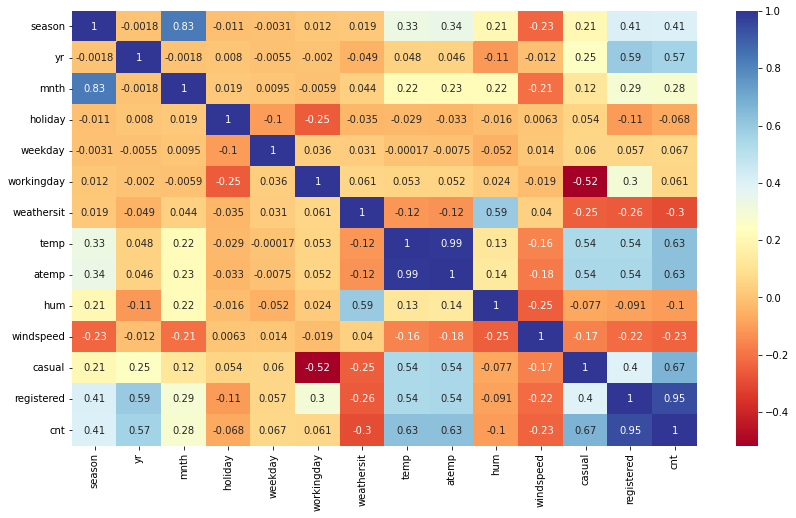

In [64]:
#plotiing thr heat map for checking corelation
plt.figure(figsize = (14, 8))
sns.heatmap(data.corr(), annot = True, cmap="RdYlBu")
plt.show()

(a) **Features such as season, year, month, weekday, workingday, temp, atemp, casual, registered have positive correlation with the response. Registered feature has the highest positive correlation with the response.**

(b) **Features such as holiday, weathersit, humidity, windspeed have negative correlation with the response**.

In [65]:
# dropping the casual and registered columns since addition of them is equal to the target variable cnt
data.drop(['casual','registered'], axis=1 , inplace=True)

In [66]:
# The coorelation between temp and atemp is very high 0.99. So we ignore one of them
data.drop(['atemp'], axis=1 , inplace=True)

In [67]:
# Replacing Categorical variables with meaningful name
data['season'] = data['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
data['mnth'] = data['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
data['weekday'] = data['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
data['weathersit'] = data['weathersit'].map({1:"Clear_Few Clouds_Partly Clouds",2:"Mist_cloudy",3:"Light snow_Light rain_Thunderstorm",4:"Heavy Rain_Ice Pallets"})

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    object 
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    object 
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    object 
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    object 
 7   temp        731 non-null    float64
 8   hum         731 non-null    float64
 9   windspeed   731 non-null    float64
 10  cnt         731 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [69]:
# Creating Dummy Variable for season, mnth, weekday, weathersit
df_seasons = pd.get_dummies(data.season,drop_first=True)
df_months = pd.get_dummies(data.mnth,drop_first=True)
df_weekdays = pd.get_dummies(data.weekday,drop_first=True)
df_weathersit = pd.get_dummies(data.weathersit,drop_first=True)

In [70]:
# concating all the dataframe to the original data
data = pd.concat([data,df_seasons,df_months,df_weekdays,df_weathersit],axis=1)

In [71]:
# Dropping season, mnth, weekday, weathersit columns as we have already created dummy variable out of it.
data.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [72]:
data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,Light snow_Light rain_Thunderstorm,Mist_cloudy
0,0,0,0,0.344167,0.805833,0.160446,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0.363478,0.696087,0.248539,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,0.196364,0.437273,0.248309,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0.200000,0.590435,0.160296,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0.226957,0.436957,0.186900,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


Step 2 : Splitting the dataset into Training and Test data

In [73]:
# importing the library for models
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [74]:
## creating the X anf y variable
y_train = data_train.pop('cnt')
X_train = data_train
y_test = data_test.pop('cnt')
X_test = data_test

In [75]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [76]:
# Predicting the Train set results
y_train_pred = regressor.predict(X_train)
regressor.coef_
print("The coefficients of linear regression for training data are: {}".format(regressor.coef_))

The coefficients of linear regression for training data are: [ 2044.0383026   -238.55477821   162.64236788  4565.8067981
 -1452.88758254 -3640.38734077  -651.18183999   159.95495262
   799.68585621    34.76953037  -446.8007358   -334.18573965
  -568.51585517  -453.52552747    39.12055934    41.75430804
   270.00200064  -437.72568603   107.00640329   563.54754728
  -210.17544613   263.95545781  -188.04304748     9.75095626
   -69.68794958   -13.62952468 -2196.15272961  -477.85457704]


In [77]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, y_train_pred)
rmse = math.sqrt(mse)
print("The root mean squared error in our dataset for training data is: {}".format(rmse))

The root mean squared error in our dataset for training data is: 741.581034009279


In [78]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train, y_train_pred)
print("The R squared value in our dataset for training data is: {}".format(r2))

The R squared value in our dataset for training data is: 0.8563648176598042


(c) The coefficients of linear regression for training data are: [ 2044.0383026   -238.55477821   162.64236788  4565.8067981
 -1452.88758254 -3640.38734077  -651.18183999   159.95495262
   799.68585621    34.76953037  -446.8007358   -334.18573965
  -568.51585517  -453.52552747    39.12055934    41.75430804
   270.00200064  -437.72568603   107.00640329   563.54754728
  -210.17544613   263.95545781  -188.04304748     9.75095626
   -69.68794958   -13.62952468 -2196.15272961  -477.85457704]

  (1) The root mean squared error in our dataset for training data is: 741.581034009279. 
 
  (2) The R squared value in our dataset for training data is: 0.8563648176598042



In [79]:
# Predicting the Test set results
y_test_pred = regressor.predict(X_test)

In [80]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_test_pred)
rmse = math.sqrt(mse)
print("The root mean squared error in our dataset for test data is: {}".format(rmse))

The root mean squared error in our dataset for test data is: 803.6864685947774


In [81]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_test_pred)
print("The R squared value in our dataset for test data is: {}".format(r2))

The R squared value in our dataset for test data is: 0.8185169547882418


(d) The root mean squared error in our dataset for test data is: 803.6864685947774.

The R squared value in our dataset for test data is: 0.8185169547882418


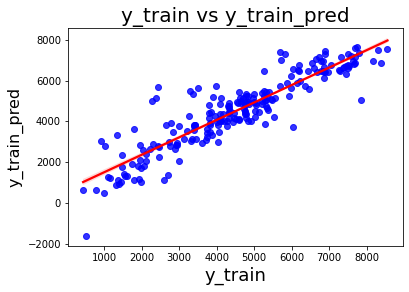

In [82]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_train vs y_train_pred', fontsize=20)
plt.xlabel('y_train', fontsize=18)
plt.ylabel('y_train_pred', fontsize=16)
plt.show()

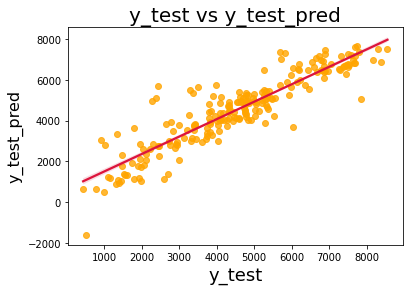

In [85]:
plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "orange"}, line_kws={"color": "crimson"})
plt.title('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)
plt.show()

(e)  We see that root mean square error for the training data is about 741.58 and the root mean square error for the testing data is 803.68 respectively. The features in our linear regression model that have positive relationship with the cnt are temp and year respectively. Yes, the model is linearly fitting the data since the model error is very less which can be calculated by the difference between RMSE for test and training data equal to 
803.68 - 741.58 = 62.1 respectively.

**Problem 5**

In [103]:
#Importing the inbuilt dataset in sklearn package for performing regression analysis.
from sklearn import datasets
diabetes = datasets.load_diabetes()
df_db = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [104]:
#Add dependent variable to the dataset
df_db['Progression'] = diabetes.target

In [105]:
# Columns of serum measurement are not useful in model building so simply we can drop it.
df_db.drop(['s1','s2','s3','s4','s5','s6'], axis=1 , inplace=True)

In [106]:
#independent variables / explanatory variables
x = df_db.drop(labels='Progression', axis=1)  
#dependent variable / response / target variable.
y = df_db['Progression']

In [107]:
#splitting the dataset into 70%-30% train-test split 
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size = 0.7, test_size = 0.3,random_state=100)

In [113]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [109]:
# Predict the progression of diabetes based on test data
y_pred = lm.predict(X_test)

In [110]:
#the coefficients & intercepts of the Regression Equation
coeff = pd.Series(lm.coef_, index = X_train.columns)
intercept = lm.intercept_

In [111]:
print("Coefficients:\n")
print(coeff)
print("\n")
print("Intercept:\n")
print(intercept)
print("\n")

Coefficients:

age     35.301961
sex   -105.832278
bmi    837.212681
bp     400.228131
dtype: float64


Intercept:

153.70892108809244




(b) Based on the outcomes from the coefficients, we see that age, bmi and bp  have positive outcomes with the target variable. That is, the patients having high bp are more prone towards disease progression according to our linear regression model. We can also see that sex feature possess negative relationship, meaning there is less possibility of patient being diagnosed with diabetes based on sex.

(c) The equation is Y = 153.7089 + 35.3019 * X1 - 105.8322 * X2 + 837.2126 * X3 + 400.2281 * X4

In [114]:
import statsmodels.api as sm
x = sm.add_constant(X_train)
model = sm.OLS(y_train,x)
result = model.fit()
result.conf_int(alpha=0.05)

,0,1
const,146.826946,160.590897
age,-118.180606,188.784528
sex,-254.666185,43.001629
bmi,683.145380,991.279982
bp,239.087085,561.369177


(d) The confidence interval for age [-118.180606, 188.784528], sex [-254.666185, 43.001629], bmi [683.145380, 991.279982] & bp [239.087085, 561.369177]

**Problem 6**

In [41]:
# In this dataset value of n = 200 and the value of p = 1
np.random.seed(12345)
x = np.random.normal(0, 1, (200))
y = x + 2 * x**2 - 2 * x**3 + np.random.normal(0, 1, (200))

(a) The model that was used to generate the data in equation form is Multiple Linear Regression.

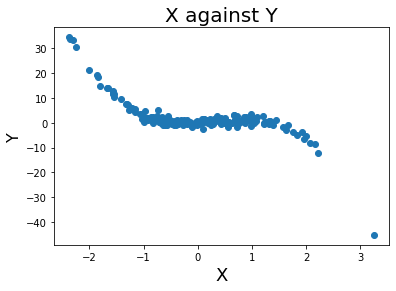

In [42]:
plt.scatter(x,y)
plt.title('X against Y', fontsize=20)
plt.xlabel('X', fontsize=18)
plt.ylabel('Y', fontsize=16)
plt.show()

(b) The above curve seems to be linear for the X values between the range of  -1  and 1. However, it shows non linear behaviour with the increment and decrement in X values respectively.

(c) Computing with a seed value = 123

In [43]:
np.random.seed(123)

In [44]:
X = np.random.normal(0, 1, (200))
y = X + 2 * X**2 - 2 * X**3 + np.random.normal(0, 1, (200))
X = X.reshape(-1, 1)
y = y.reshape(-1, 1) 

In [45]:
pf = PolynomialFeatures(degree = 1)
X_pf = pf.fit_transform(X)
loo = LeaveOneOut()
lm = LinearRegression()
cve = cross_val_score(estimator = lm, X = X_pf, y = y, cv = loo, scoring = 'neg_mean_squared_error').mean()
print("The Average Cross Validation Error using Leave One Out Cross Validation is: {}".format(cve))

The Average Cross Validation Error using Leave One Out Cross Validation is: -54.44031803203236


In [46]:
pf = PolynomialFeatures(degree = 2)
X_pf = pf.fit_transform(X)
loo = LeaveOneOut()
lm = LinearRegression()
cve = cross_val_score(estimator = lm, X = X_pf, y = y, cv = loo, scoring = 'neg_mean_squared_error').mean()
print("The Average Cross Validation Error using Leave One Out Cross Validation is: {}".format(cve))

The Average Cross Validation Error using Leave One Out Cross Validation is: -31.50170013487161


In [47]:
pf = PolynomialFeatures(degree = 3)
X_pf = pf.fit_transform(X)
loo = LeaveOneOut()
lm = LinearRegression()
cve = cross_val_score(estimator = lm, X = X_pf, y = y, cv = loo, scoring = 'neg_mean_squared_error').mean()
print("The Average Cross Validation Error using Leave One Out Cross Validation is: {}".format(cve))

The Average Cross Validation Error using Leave One Out Cross Validation is: -0.8730559711228898


In [48]:
pf = PolynomialFeatures(degree = 4)
X_pf = pf.fit_transform(X)
loo = LeaveOneOut()
lm = LinearRegression()
cve = cross_val_score(estimator = lm, X = X_pf, y = y, cv = loo, scoring = 'neg_mean_squared_error').mean()
print("The Average Cross Validation Error using Leave One Out Cross Validation is: {}".format(cve))

The Average Cross Validation Error using Leave One Out Cross Validation is: -0.8810894543450086


In [49]:
pf = PolynomialFeatures(degree = 5)
X_pf = pf.fit_transform(X)
loo = LeaveOneOut()
lm = LinearRegression()
cross_validation_error = cross_val_score(estimator = lm, X = X_pf, y = y, cv = loo, scoring = 'neg_mean_squared_error').mean()
print("The Average Cross Validation Error using Leave One Out Cross Validation is: {}".format(cve))

The Average Cross Validation Error using Leave One Out Cross Validation is: -0.8810894543450086


(c) Repeating with another seed value = 12345

In [50]:
np.random.seed(12345)

In [51]:
X = np.random.normal(0, 1, (200))
y = X + 2 * X**2 - 2 * X**3 + np.random.normal(0, 1, (200))
X = X.reshape(-1, 1)
y = y.reshape(-1, 1) 

In [52]:
pf = PolynomialFeatures(degree = 1)
X_pf = pf.fit_transform(X)
loo = LeaveOneOut()
lm = LinearRegression()
cve = cross_val_score(estimator = lm, X = X_pf, y = y, cv = loo, scoring = 'neg_mean_squared_error').mean()
print("The Average Cross Validation Error using Leave One Out Cross Validation is: {}".format(cve))

The Average Cross Validation Error using Leave One Out Cross Validation is: -26.534996047663075


In [53]:
pf = PolynomialFeatures(degree = 2)
X_pf = pf.fit_transform(X)
loo = LeaveOneOut()
lm = LinearRegression()
cve = cross_val_score(estimator = lm, X = X_pf, y = y, cv = loo, scoring = 'neg_mean_squared_error').mean()
print("The Average Cross Validation Error using Leave One Out Cross Validation is: {}".format(cve))

The Average Cross Validation Error using Leave One Out Cross Validation is: -32.53855587022528


In [54]:
pf = PolynomialFeatures(degree = 3)
X_pf = pf.fit_transform(X)
loo = LeaveOneOut()
lm = LinearRegression()
cve = cross_val_score(estimator = lm, X = X_pf, y = y, cv = loo, scoring = 'neg_mean_squared_error').mean()
print("The Average Cross Validation Error using Leave One Out Cross Validation is: {}".format(cve))

The Average Cross Validation Error using Leave One Out Cross Validation is: -1.1079418003348254


In [55]:
pf = PolynomialFeatures(degree = 4)
X_pf = pf.fit_transform(X)
loo = LeaveOneOut()
lm = LinearRegression()
cve = cross_val_score(estimator = lm, X = X_pf, y = y, cv = loo, scoring = 'neg_mean_squared_error').mean()
print("The Average Cross Validation Error using Leave One Out Cross Validation is: {}".format(cve))

The Average Cross Validation Error using Leave One Out Cross Validation is: -1.3234306760123546


In [56]:
pf = PolynomialFeatures(degree = 5)
X_pf = pf.fit_transform(X)
loo = LeaveOneOut()
lm = LinearRegression()
cve = cross_val_score(estimator = lm, X = X_pf, y = y, cv = loo, scoring = 'neg_mean_squared_error').mean()
print("The Average Cross Validation Error using Leave One Out Cross Validation is: {}".format(cve))

The Average Cross Validation Error using Leave One Out Cross Validation is: -1.1099273761939192


(d) The results are actually different since model produces different coefficients based on separate random values. Thus, the cross-validation error changes because we are getting different results in Y equation for change in values respectively.

(e) After performing the analysis, we can see that a degree 3 equation had the smallest leave-one-out cross validation error among the others respectively. It was evident that after a certain increse in degree the model started to be overfitting leading to increase in cross-validation error. For the cubic equation, the model was able to best-fit but with the increase in degree the new features learned by the model seems to be insufficient in reducing the error further.